# Loading the needed libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
df=pd.read_csv('sql_injection_dataset.csv')
df.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


### Dataset description 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


In [4]:
df.describe(include='all')

,Query,Label
count,30919,30919.000000
unique,30905,NaN
top,#NAME?,NaN
freq,8,NaN
mean,NaN,0.368123
std,NaN,0.482303
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [5]:
df.shape

(30919, 2)

# Data preprocessing:  Data cleaning

### checking for missing values

In [6]:
df.isna().sum()

Query    0
Label    0
dtype: int64

### checking for duplicates 

In [7]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()

# Investigate the "#NAME?" entries
name_entries = (df['Query'] == '#NAME?').sum()

print('number of duplicated rows=', duplicate_rows)
print('munber of #NAME enteries =', name_entries)

number of duplicated rows= 12
munber of #NAME enteries = 8


In [8]:
# Inspect the distribution of labels for the duplicate rows
duplicate_label_distribution = df[df.duplicated(keep=False)].groupby('Label').size()

# Inspect the entries with "#NAME?"
name_entries = df[df['Query'] == '#NAME?']

duplicate_label_distribution, name_entries

(Label
 0    12
 1     8
 dtype: int64,
         Query  Label
 656    #NAME?      1
 866    #NAME?      1
 13318  #NAME?      0
 13532  #NAME?      0
 15635  #NAME?      0
 17913  #NAME?      0
 18233  #NAME?      0
 18875  #NAME?      0)

In [9]:
# Remove all duplicate rows
cleaned_dataset = df.drop_duplicates()

# Remove all "#NAME?" entries
cleaned_dataset = cleaned_dataset[cleaned_dataset['Query'] != '#NAME?']

# Check the new shape of the dataset
new_shape = cleaned_dataset.shape

# Display the new shape and the first few rows to confirm changes
new_shape, cleaned_dataset.head()


((30905, 2),
                                                Query  Label
 0                  " or pg_sleep  (  __TIME__  )  --      1
 1  create user name identified by pass123 tempora...      1
 2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
 3   select * from users where id  =  '1' or @ @1 ...      1
 4   select * from users where id  =  1 or 1#"  ( ...      1)

## Exploratory data analysis

C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

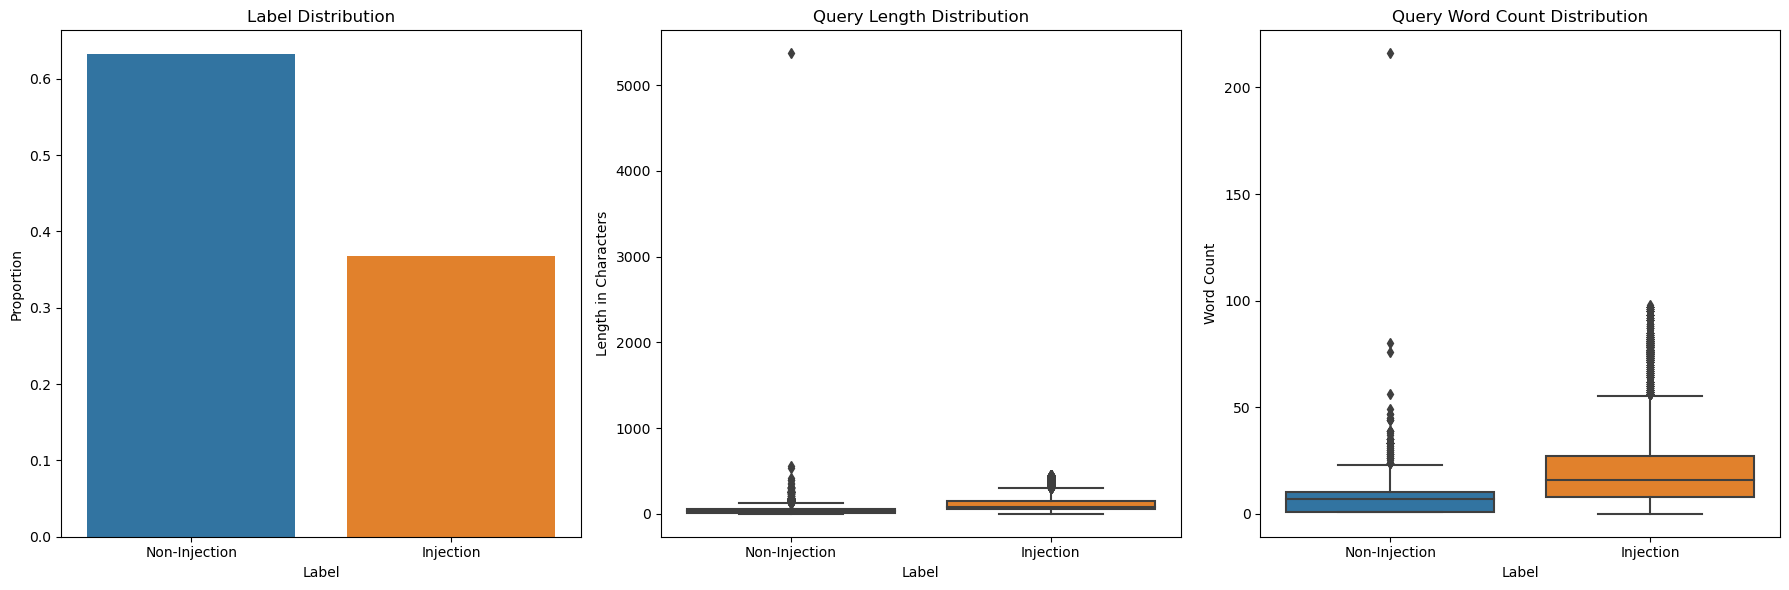

In [10]:
# Label Distribution
label_distribution = cleaned_dataset['Label'].value_counts(normalize=True)

# Query Length Analysis
cleaned_dataset['Query_Length'] = cleaned_dataset['Query'].apply(len)  # Length in characters
cleaned_dataset['Word_Count'] = cleaned_dataset['Query'].apply(lambda x: len(x.split()))  # Word count

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Label distribution
sns.barplot(x=label_distribution.index, y=label_distribution.values, ax=ax[0])
ax[0].set_title('Label Distribution')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Proportion')
ax[0].set_xticklabels(['Non-Injection', 'Injection'])

# Query length distribution
sns.boxplot(x='Label', y='Query_Length', data=cleaned_dataset, ax=ax[1])
ax[1].set_title('Query Length Distribution')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Length in Characters')
ax[1].set_xticklabels(['Non-Injection', 'Injection'])

# Word count distribution
sns.boxplot(x='Label', y='Word_Count', data=cleaned_dataset, ax=ax[2])
ax[2].set_title('Query Word Count Distribution')
ax[2].set_xlabel('Label')
ax[2].set_ylabel('Word Count')
ax[2].set_xticklabels(['Non-Injection', 'Injection'])

plt.tight_layout()
plt.show()


In [11]:
cleaned_dataset

,Query,Label,Query_Length,Word_Count
0,""" or pg_sleep ( __TIME__ ) --",1,33,7
1,create user name identified by pass123 tempora...,1,90,12
2,AND 1 = utl_inaddr.get_host_address ( ...,1,218,35
3,select * from users where id = '1' or @ @1 ...,1,90,20
4,"select * from users where id = 1 or 1#"" ( ...",1,85,18
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37,7
30915,DELETE FROM tomorrow,0,20,3
30916,SELECT wide ( s ) FROM west,0,28,7
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44,9


## Further exploratory data analysis 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Function to get top N words, bigrams, trigrams
def get_top_n_words(corpus, n=None, n_grams=1):
    vec = CountVectorizer(stop_words='english', ngram_range=(n_grams, n_grams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Split the dataset into injection and non-injection queries
injection_queries = cleaned_dataset[cleaned_dataset['Label'] == 1]['Query']
non_injection_queries = cleaned_dataset[cleaned_dataset['Label'] == 0]['Query']

# Get top 10 words for both categories
top_10_words_injection = get_top_n_words(injection_queries, n=10)
top_10_words_non_injection = get_top_n_words(non_injection_queries, n=10)

# Get top 10 bigrams for both categories
top_10_bigrams_injection = get_top_n_words(injection_queries, n=10, n_grams=2)
top_10_bigrams_non_injection = get_top_n_words(non_injection_queries, n=10, n_grams=2)

print('Top 10 words injection=', top_10_words_injection) 
print('Top 10 words non injection=', top_10_words_non_injection) 
print('Top 10 bigram injection=', top_10_bigrams_injection)
print('Top 10 bigram non injection=', top_10_bigrams_non_injection)


Top 10 words injection= [('select', 10008), ('chr', 6588), ('char', 5631), ('null', 5028), ('113', 3755), ('union', 2443), ('end', 1651), ('case', 1586), ('count', 1539), ('122', 1502)]
Top 10 words non injection= [('select', 12776), ('order', 1102), ('join', 1038), ('count', 899), ('rows', 847), ('fetch', 842), ('orders', 817), ('percent', 755), ('avg', 751), ('50', 742)]
Top 10 bigram injection= [('null null', 3340), ('chr 113', 2680), ('union select', 2442), ('113 chr', 1716), ('select count', 1539), ('select case', 1520), ('char 113', 1075), ('chr 122', 1072), ('122 chr', 1072), ('select null', 789)]
Top 10 bigram non injection= [('select count', 765), ('select avg', 751), ('50 percent', 738), ('select sum', 437), ('1996 07', 434), ('fetch rows', 428), ('percent rows', 416), ('fetch 50', 413), ('union select', 323), ('select 50', 322)]


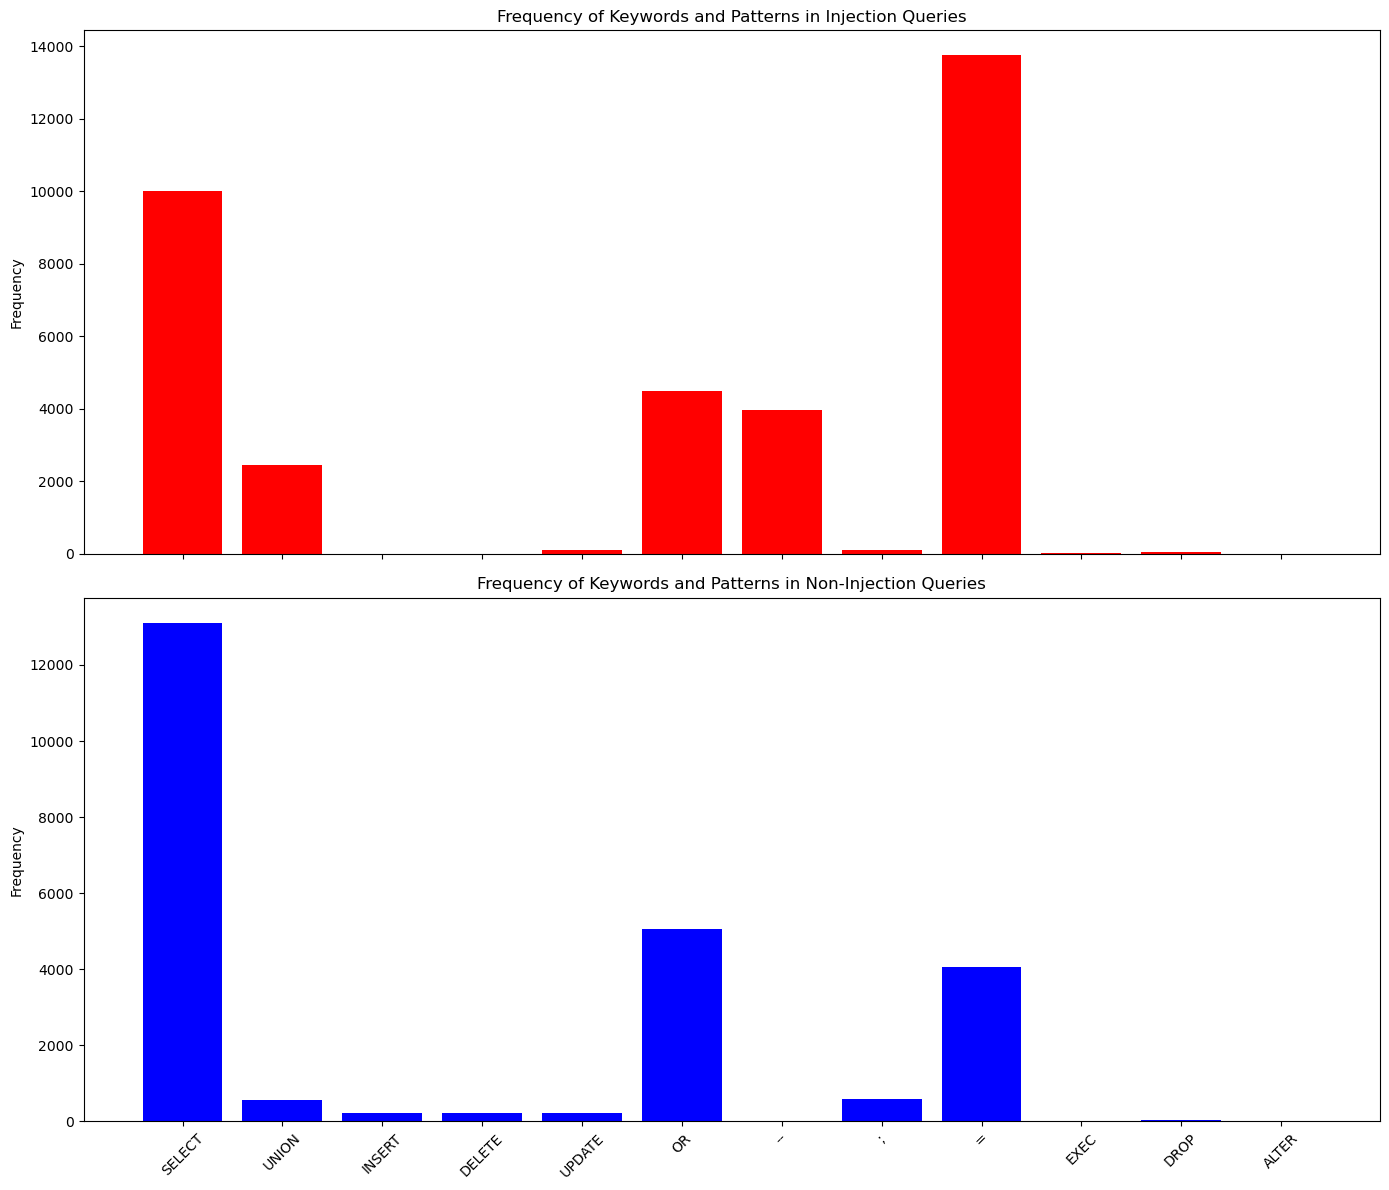

In [13]:
from collections import Counter
import re
x_data=cleaned_dataset.copy()
# Define a list of SQL keywords and special patterns to look for
keywords_patterns = ['SELECT', 'UNION', 'INSERT', 'DELETE', 'UPDATE', 'OR', '--', ';', '=', 'EXEC', 'DROP', 'ALTER']

# Function to count occurrences of each keyword/pattern
def count_keywords(query):
    counts = {key: 0 for key in keywords_patterns}
    for key in keywords_patterns:
        counts[key] = len(re.findall(key, query.upper()))
    return counts

# Apply the function to each query and sum up the counts for injection and non-injection queries separately
x_data['Keyword_Counts'] = x_data['Query'].apply(count_keywords)
keyword_counts = pd.DataFrame(x_data['Keyword_Counts'].tolist())
x_data = pd.concat([x_data, keyword_counts], axis=1)

# Summing up the counts for injection and non-injection queries
keyword_sums_injection = x_data[x_data['Label'] == 1][keywords_patterns].sum()
keyword_sums_non_injection = x_data[x_data['Label'] == 0][keywords_patterns].sum()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

ax[0].bar(keyword_sums_injection.index, keyword_sums_injection.values, color='r')
ax[0].set_title('Frequency of Keywords and Patterns in Injection Queries')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(keyword_sums_non_injection.index, keyword_sums_non_injection.values, color='b')
ax[1].set_title('Frequency of Keywords and Patterns in Non-Injection Queries')
ax[1].set_ylabel('Frequency')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Feature engineering 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text: Lowercasing (retaining special characters)
cleaned_dataset['Query_Preprocessed'] = cleaned_dataset['Query'].str.lower()

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for demonstration

# Fit and transform the preprocessed queries
tfidf_features = tfidf_vectorizer.fit_transform(cleaned_dataset['Query_Preprocessed'])

# Convert to DataFrame
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


tfidf_features_df

,01,06,07,09,0x28,0x2e,0x4b774c75,0x4c4d6142,0x52515a50,0x544d5a4c,...,wrong,xmltype,ydpu,year,yes,yesterday,yet,yourself,youth,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### additional features extraction

In [15]:
# Include Query Length and Word Count as features
additional_features = cleaned_dataset[['Query_Length', 'Word_Count']].reset_index(drop=True)

# Combine TF-IDF features with additional features
features_combined = pd.concat([tfidf_features_df, additional_features], axis=1)

print(features_combined.shape)
features_combined.head()

(30905, 1002)


,01,06,07,09,0x28,0x2e,0x4b774c75,0x4c4d6142,0x52515a50,0x544d5a4c,...,ydpu,year,yes,yesterday,yet,yourself,youth,zulu,Query_Length,Word_Count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90,12
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218,35
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90,20
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85,18


## Spliting the data into training and testing 

In [16]:
from sklearn.model_selection import train_test_split
X=features_combined
y=cleaned_dataset['Label']

# Assuming `features_combined` is your features dataframe and `y` is your target array
X_train, X_test, y_train, y_test = train_test_split(features_combined, y, test_size=0.2, random_state=42)

## Training a Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# LR model evaluation 

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9906164051124413
Precision: 0.9941860465116279
Recall: 0.9801587301587301
F1 Score: 0.9871225577264653


In [19]:
from sklearn.metrics import confusion_matrix, classification_report


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)
print(conf_matrix)

print(classification_report(y_test, lr_pred))

[[3900   13]
 [  45 2223]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3913
           1       0.99      0.98      0.99      2268

    accuracy                           0.99      6181
   macro avg       0.99      0.99      0.99      6181
weighted avg       0.99      0.99      0.99      6181



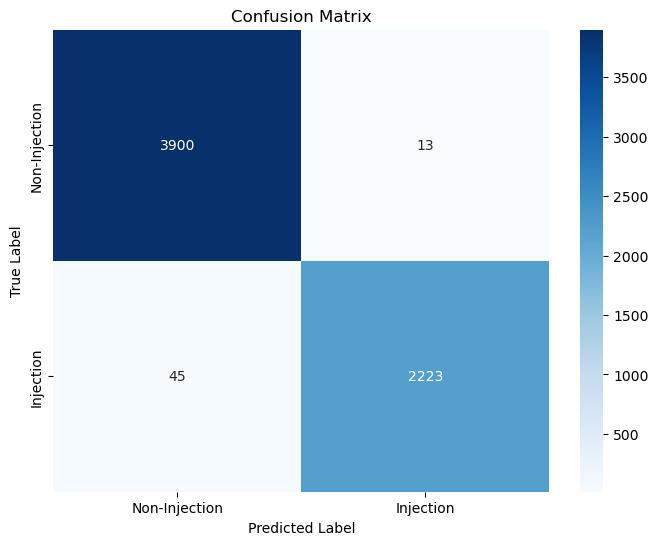

In [20]:
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Injection', 'Injection'], yticklabels=['Non-Injection', 'Injection'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

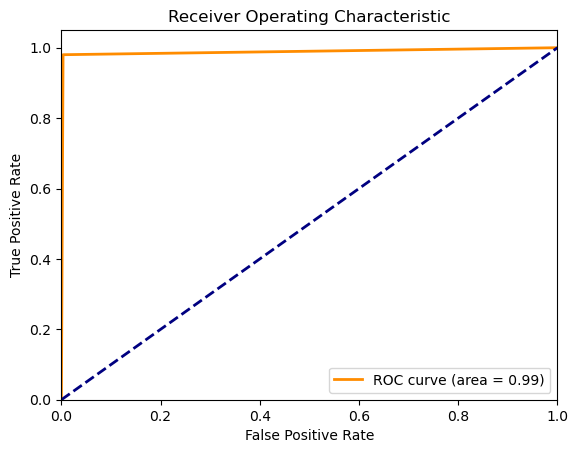

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    
    title : string
        Title for the chart.
    
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    
    y : array-like, shape (n_samples) or (n_samples, n_features)
        Target relative to X for classification or regression;
    
    axes : axes object, optional (default=None)
        Axes used to plot the curves.
    
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
    
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
    
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                                           train_sizes=train_sizes,
                                                                           return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, color="r", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, color="g", alpha=0.1)
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\OWNER\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

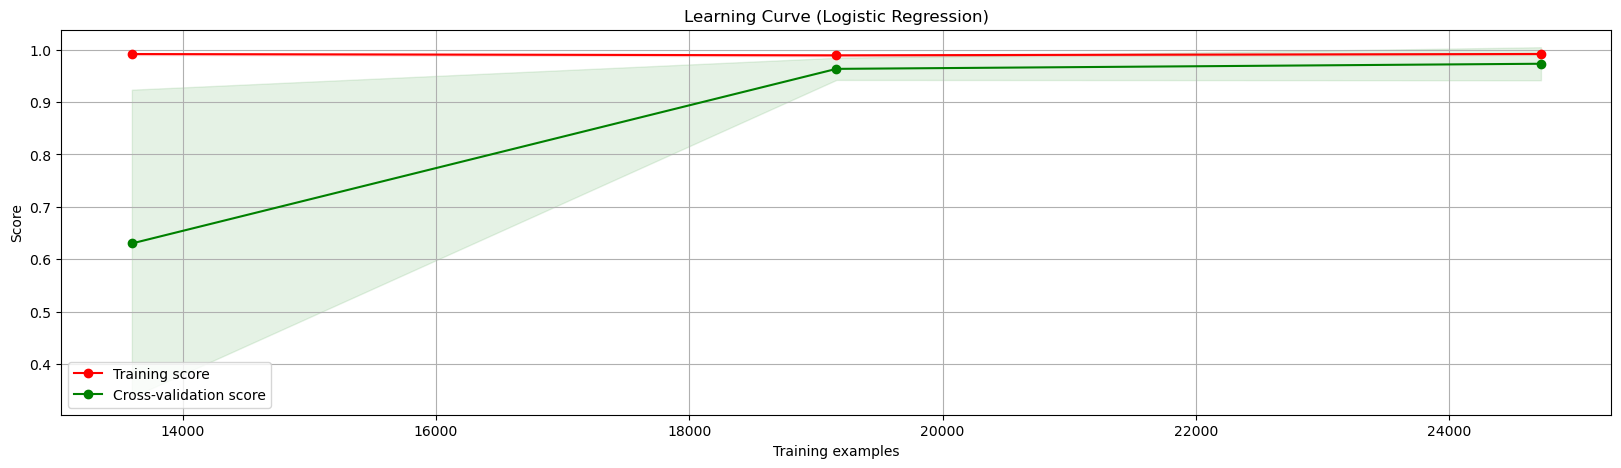

In [23]:
plot_learning_curve(estimator=LogisticRegression(max_iter=1000), 
                    title = "Learning Curve (Logistic Regression)",
                   X=X,y=y)

# Training a Naive bayes model 

In [24]:
from sklearn.naive_bayes import MultinomialNB
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test set
pred_nb = nb_classifier.predict(X_test)

# NB model evaluation 

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred_nb)
precision = precision_score(y_test, pred_nb)
recall = recall_score(y_test, pred_nb)
f1 = f1_score(y_test, pred_nb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9678045623685487
Precision: 0.9813866914844114
Recall: 0.9298941798941799
F1 Score: 0.9549467964681911


In [26]:
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_nb)
print(conf_matrix)
print(classification_report(y_test, pred_nb))

[[3873   40]
 [ 159 2109]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3913
           1       0.98      0.93      0.95      2268

    accuracy                           0.97      6181
   macro avg       0.97      0.96      0.96      6181
weighted avg       0.97      0.97      0.97      6181



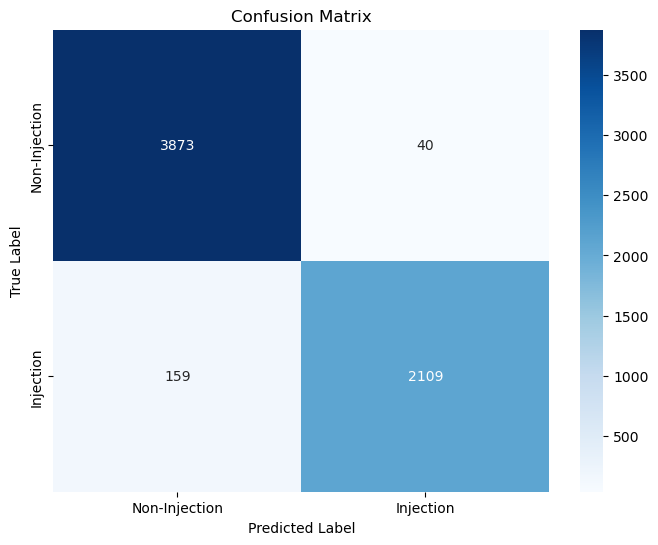

In [27]:
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Injection', 'Injection'], yticklabels=['Non-Injection', 'Injection'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

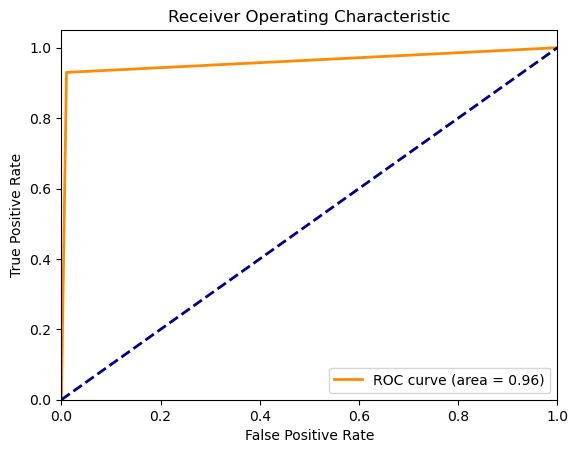

In [28]:

fpr, tpr, thresholds = roc_curve(y_test, pred_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\OWNER\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

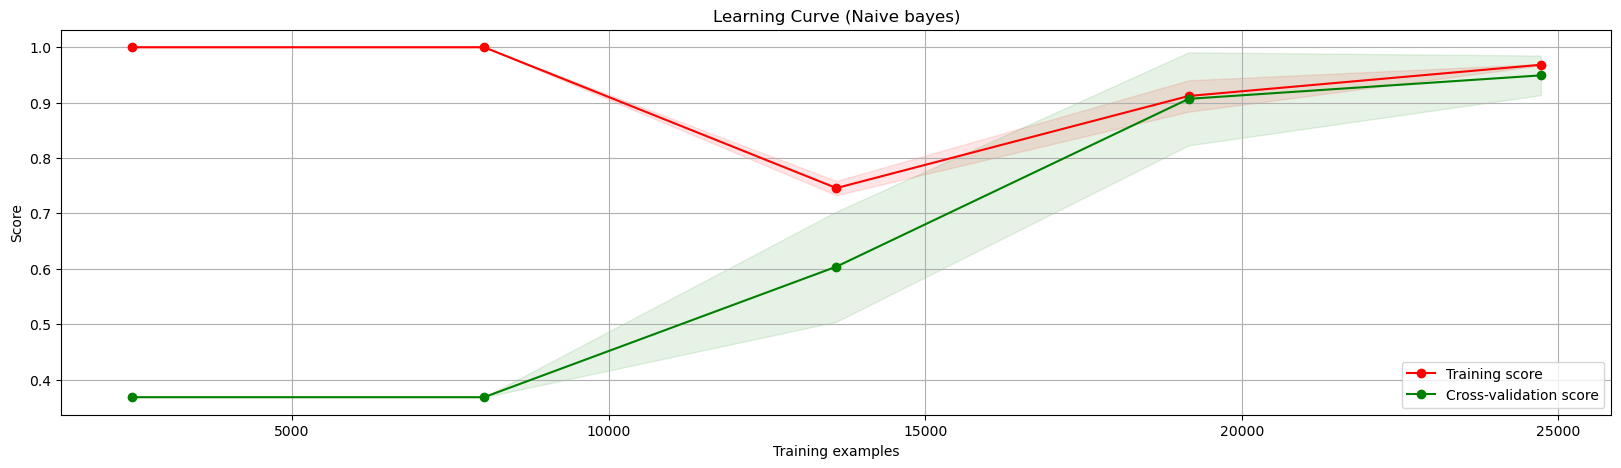

In [29]:
plot_learning_curve(estimator=MultinomialNB(), 
                    title = "Learning Curve (Naive bayes)",
                   X=X,y=y)

# Training a Random Forest model

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
pred_rf = rf_classifier.predict(X_test)

# RF model evaluation 

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred_rf)
precision = precision_score(y_test, pred_rf)
recall = recall_score(y_test, pred_rf)
f1 = f1_score(y_test, pred_rf)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9962789192687267
Precision: 0.9982245894363071
Recall: 0.9916225749559083
F1 Score: 0.9949126299491262


In [32]:
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print(conf_matrix)

print(classification_report(y_test, pred_rf))

[[3909    4]
 [  19 2249]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3913
           1       1.00      0.99      0.99      2268

    accuracy                           1.00      6181
   macro avg       1.00      1.00      1.00      6181
weighted avg       1.00      1.00      1.00      6181



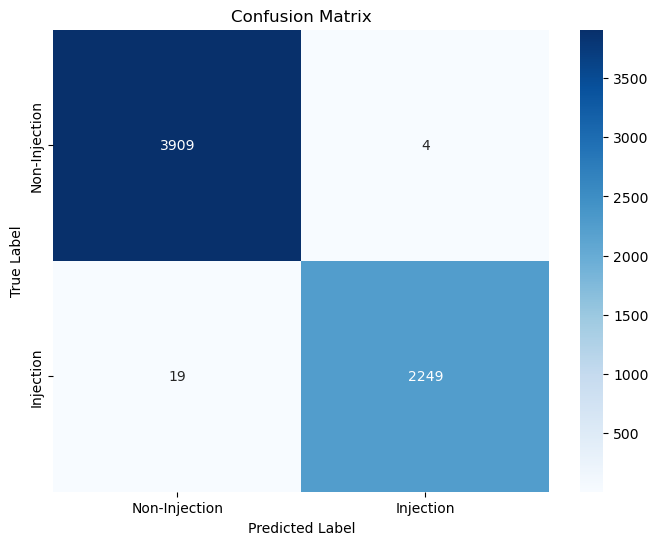

In [33]:
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Injection', 'Injection'], yticklabels=['Non-Injection', 'Injection'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

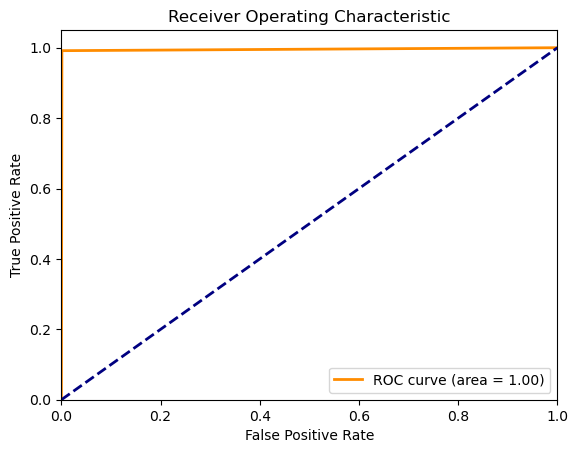

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\OWNER\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

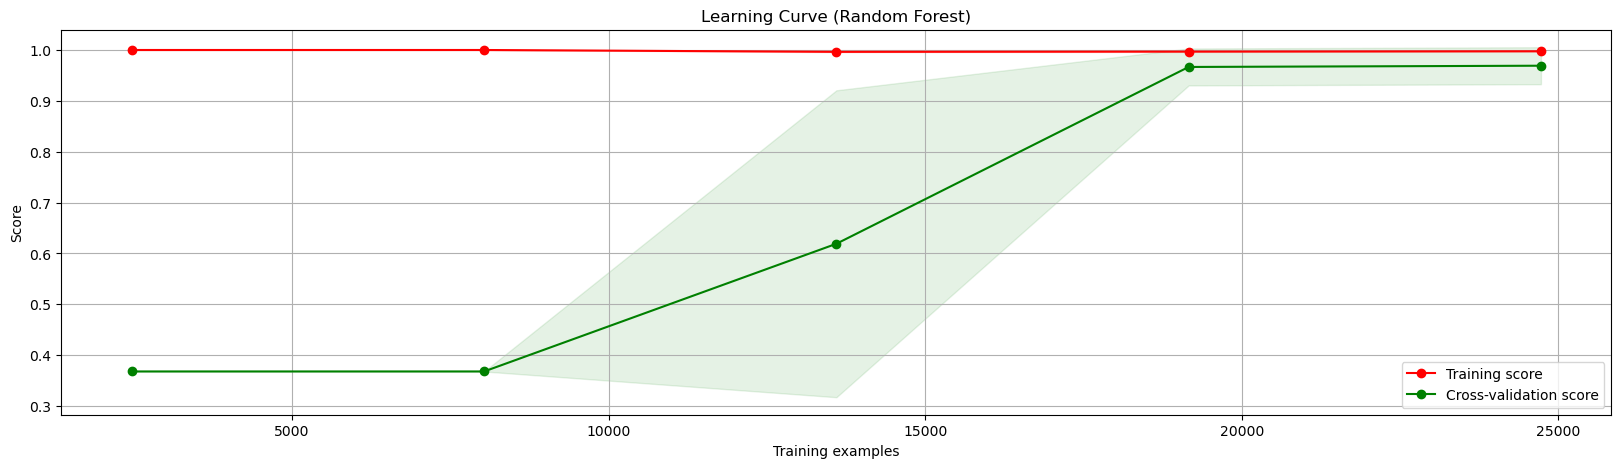

In [35]:
plot_learning_curve(estimator=RandomForestClassifier(n_estimators=100, random_state=42), 
                    title = "Learning Curve (Random Forest)",
                   X=X,y=y)

# Training An ANN Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Building the model
ANN_model = Sequential()
ANN_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(64, activation='relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = ANN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
#  model evaluation 
loss, accuracy = ANN_model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')





Epoch 1/10


619/619 [==============================] - 3s 3ms/step - loss: 0.5884 - accuracy: 0.7369 - val_loss: 0.1496 - val_accuracy: 0.9573
Epoch 2/10
619/619 [==============================] - 2s 3ms/step - loss: 0.1377 - accuracy: 0.9593 - val_loss: 0.0552 - val_accuracy: 0.9838
Epoch 3/10
619/619 [==============================] - 2s 3ms/step - loss: 0.0772 - accuracy: 0.9800 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 4/10
619/619 [==============================] - 2s 3ms/step - loss: 0.0909 - accuracy: 0.9788 - val_loss: 0.0366 - val_accuracy: 0.9923
Epoch 5/10
619/619 [==============================] - 2s 4ms/step - loss: 0.0572 - accuracy: 0.9848 - val_loss: 0.0323 - val_accuracy: 0.9931
Epoch 6/10
619/619 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.9863 - val_loss: 0.0300 - val_accuracy: 0.9933
Epoch 7/10
619/619 [==============================] - 3s 5ms/step - loss: 0.0493 - accuracy: 0.9875 - val_loss: 0.0262 - val_accuracy: 0.9939
E

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ANN_pred_probs = ANN_model.predict(X_test).ravel()  # get probabilities of the positive class
ann_pred = np.where(ANN_pred_probs > 0.5, 1, 0)
accuracy = accuracy_score(y_test, ann_pred)
precision = precision_score(y_test, ann_pred)
recall = recall_score(y_test, ann_pred)
f1 = f1_score(y_test, ann_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

194/194 [==============================] - 0s 1ms/step
Accuracy: 0.9909399773499433
Precision: 0.9885159010600707
Recall: 0.9867724867724867
F1 Score: 0.9876434245366283


In [38]:
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ann_pred)
print(conf_matrix)

print(classification_report(y_test, ann_pred))

[[3887   26]
 [  30 2238]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3913
           1       0.99      0.99      0.99      2268

    accuracy                           0.99      6181
   macro avg       0.99      0.99      0.99      6181
weighted avg       0.99      0.99      0.99      6181



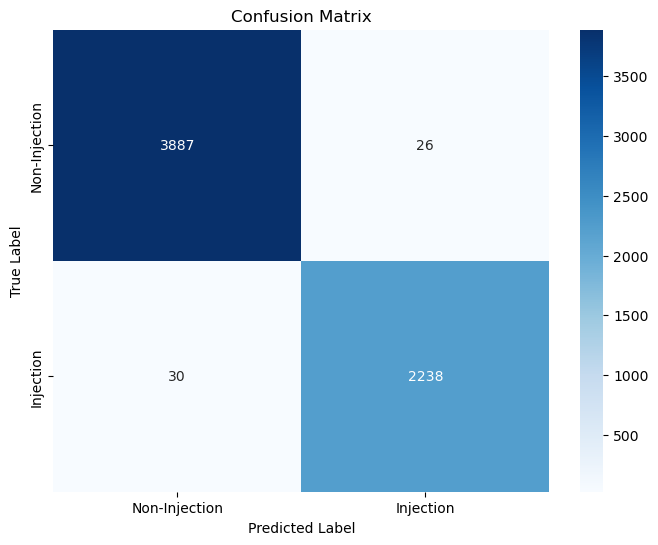

In [39]:
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Injection', 'Injection'], yticklabels=['Non-Injection', 'Injection'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

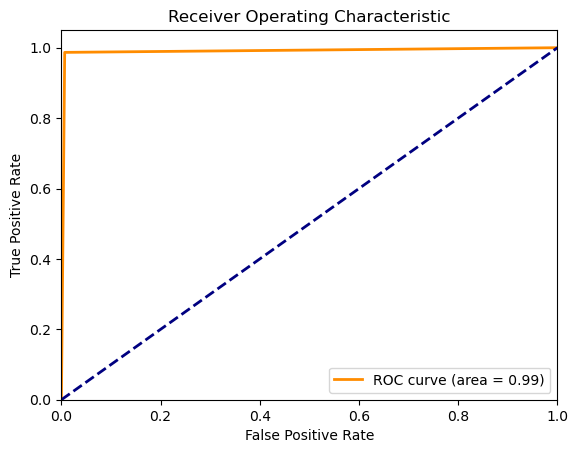

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, ann_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

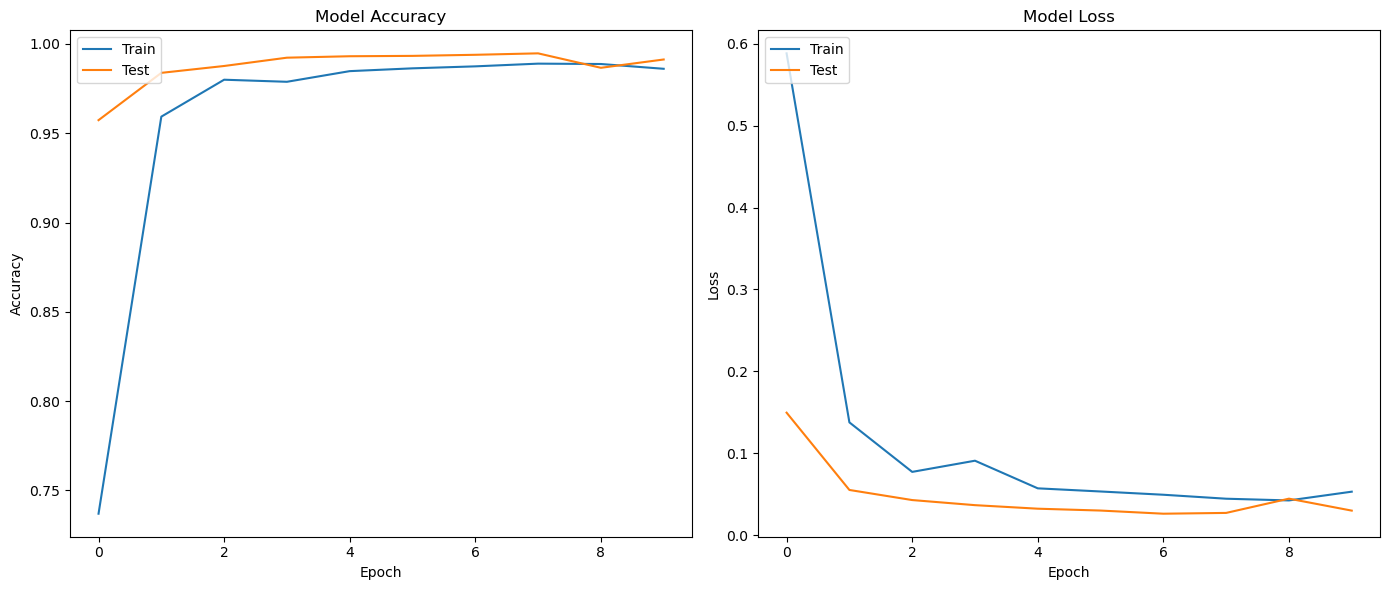

In [41]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Selecting and hypertuning the best model (Random forest)

## hyerparameter tuning of Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# define the parameters 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, 
                           scoring='accuracy')

# taining the grid search 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [43]:
# checking the best parameter 
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# model prediction 
best_rf_predictions = best_rf_model.predict(X_test)

Best parameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


# Fine tuned RF model evaluation 

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, best_rf_predictions)
precision = precision_score(y_test, best_rf_predictions)
recall = recall_score(y_test, best_rf_predictions)
f1 = f1_score(y_test, best_rf_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9962789192687267
Precision: 0.9982245894363071
Recall: 0.9916225749559083
F1 Score: 0.9949126299491262


In [45]:
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, best_rf_predictions)
print(conf_matrix)

print(classification_report(y_test, best_rf_predictions))

[[3909    4]
 [  19 2249]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3913
           1       1.00      0.99      0.99      2268

    accuracy                           1.00      6181
   macro avg       1.00      1.00      1.00      6181
weighted avg       1.00      1.00      1.00      6181



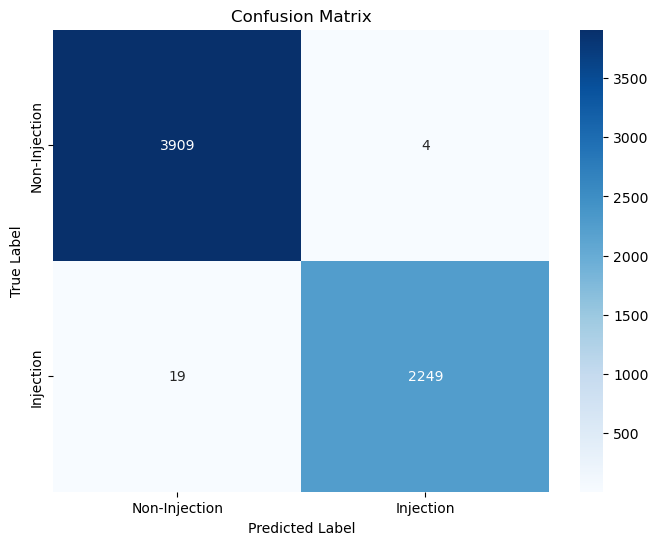

In [46]:
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Injection', 'Injection'], yticklabels=['Non-Injection', 'Injection'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

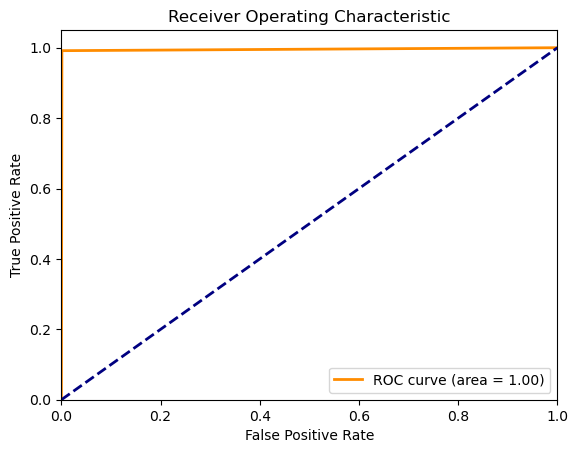

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, best_rf_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Creating a pipeline for the detection of raw SQL queries using the best model 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

X=cleaned_dataset['Query_Preprocessed']
y=cleaned_dataset['Label']
# Define the feature extraction and classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, max_features=1000)),  # Adjust parameters as needed
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)),  # Placeholder classifier
])

# Train the pipeline to test its prediction accuracy
pipeline.fit(X, y)

# pipe_pred=pipeline.predict(X_test)
# print(classification_report(y_test,pipe_pred))

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=1000)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
new_queries = ["SELECT * FROM users WHERE user_id = '1';", "DROP TABLE users; --",
               " select * from users where id  =  '1' %!<@ union select 1,version  (    )   -- 1'",
              "union select * from users where login   =   char ...",
               "SELECT * FROM wooden WHERE grandmother NOT LIKE 'tonight%'",
               " UPDATE there SET wire = 'smell'WHERE left = 'man'"
              ]
predictions = pipeline.predict(new_queries)

print(predictions)

[0 1 1 1 0 0]
